### Amaç

Bu projede araba modelleri ve bu modellere ait bazı bilgiler bulunmaktadır. Amacımız bir araba firmasının ez an karbon salınımına sahip aracını, veri bilimi yöntemlerinden simple linear regression yöntemini kullanarak fiziki test masraflarına gerek kalamdan belirlemektir. Firma corbon salınımı en az aracı bulmak için fiziksel ortamda yapılacak test masraflarından kaçınmak için veri bilimine başvurmuştur. Carbon salımı en az olan aracı bularak daha sonra bu aracı prototipleyerek sıfır masrafla üretim aşamasına geçmek istemektedir.

Bu projede yukarıda belirtildiği gibi simple linear regrassion kullanılacaktır. Regrasyon algoritmaları çeşitlilik göstermektedir ve veri bilimi konusunda en çok tercih edilen algoritmaların başında gelmektedir. Bunun nedeni kullanımı kolay ve hızlı olmasıdır.<br>

##### Linear Regrasyon Nedir?
Doğrusal regresyon, iki veya daha fazla değişken arasındaki ilişkiyi tanımlamak için kullanılan doğrusal bir modelin yaklaşımıdır. Basit doğrusal regresyonda iki değişken vardır: bağımlı değişken ve bağımsız değişken. Doğrusal regresyondaki kilit nokta, bağımlı değerimizin sürekli olmasıdır. Bununla birlikte, bağımsız değişkenler kategorik veya sürekli bir ölçüm ölçeğinde ölçülebilir olmalıdır. Basit doğrusal regresyon, bağımlı bir değişkeni tahmin etmek için bir bağımsız değişken kullanıldığında gerçekleşir. Örneğin, “yaş” değişkenini ile “sigara bağımlılığı” değişkeni arasındaki ilişkiye bakılarak ilgili yaşa sahip bir kişinin sigara kullanımı tahmin edilebilir. Regrasyon hakkında ki bilgilerinizi geliştirmek isterseniz aşağıdaki kaynaklara bakabilirsiniz. 

*Regression Models:* <br>
*1.Simple Linear Regression*<br>
*2.Multiple Linear Regression*<br>
*3.Non Linear Regression*<br>
*4.Logistic Regression*<br>
*5.Polynominal Regression*<br>

*1.Doc:* https://en.wikipedia.org/wiki/Regression_analysis <br>
*2.Doc:* https://www.analyticsvidhya.com/blog/2015/08/comprehensive-guide-regression/ <br>
*3.Doc:* https://medium.com/batech/do%C4%9Frusal-regresyon-algoritmas%C4%B1n%C4%B1n-mant%C4%B1%C4%9F%C4%B1-ve-uygulanmas%C4%B1-e65a86f806fd <br>

Bu uygulamada *sklearn* kütüphanesine ait modüllerden yaralanacağız.<br>
**Doc:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

**Sklearn?** <br>
*Sklearn* açık kaynak kodlu bir makine öğrenimi kütüphanesidir. İçerisinde popüler olarak kullanılan bir çok makine ve derin öğrenme algortimasını barındırmaktadır. Bu algoritmaları modüler olarak sadece tek satır kod ile projelerime ekleyebilir ve kullanabiliriz. Ayrıca Sklearn en popüler veri bilim araçları ve kütüphaneleri ile entegredir. Alternatifleri vardır. Örneğin *tensorflow*. Araştırınız...

**Machine Learning Book:** <br>
https://www.amazon.com/Introduction-Machine-Learning-Python-Scientists-ebook/dp/B01M0LNE8C/ref=sr_1_4?crid=3PRVREJTN1I4H&dchild=1&keywords=machine+learning&qid=1589016211&sprefix=machine+le%2Caps%2C265&sr=8-4 <br>

**Dikkat:** Makine öğrenimi yeteneklerinizi geliştirebilmeniz için veri setleri ve basitten zora doğru hatta ödüllü sorular içeren açık kaynak (free) bir portal. <br>
**Doc:** https://www.kaggle.com/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pwd

'C:\\Users\\beast'

In [3]:
cd data

C:\Users\beast\data


In [4]:
pwd

'C:\\Users\\beast\\data'

**df:** Dataframe'in kısaltmasıdır. Sckitlearn ve pandas kütüphanesi vb. dokümantasonylardaki projelerde dataframe "df" kısatlması ile anılır. Bu bir best practice'dir. Uyulmasada olur. Dataframe geri dönücek olursak dataframe *pandas* kütüphanesine ait birincil veri yapısıdır. Excel gibi satır ve sutünlardan oluşmaktadır. 

**read_csv:** Panda kütüphanesine ait olan bu method yardımyla istediğimiz lokasyondaki *csv* formatında tutulan ve metod içerisinde parametre olarak gönderdiğimiz ilgili formattaki veriyi okuyabiliriz. 

**Doc:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html

*Not:* "CSV" virgüller ile ayrılmış bir Excel formatıdır.

In [5]:
df = pd.read_csv("regressiondata.csv")

**head():** Bu method yukarıda okuduğumuz veri setine ait ilk 5 satırı bize teslim eder. <br>
*Doc:* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html

**Dikkat:** Burada dikkat etmeniz gereken husus şuadur. Biz *csv* formatında tutulan yani virgüller ile ayrılmış bir veri okuduk lakin okuduğumuz veriyi ekrana bastığımızda karşımıza satır ve sütunlardan oluşan bir yapı çıktı. Bunu bize sağlayan panda kütüphanesidir. Unutmayın *panda* kütüphanesi dataframe'lerle çalışır.

In [25]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


**describe():** Bu method veri setimizde bulunan her bir satırdaki değeri sutün bazında bazı aritmariksel işlemler yaparak bize özet bir tablo sundu. Nedir bu aritmatiksel işlmeler;<br>
*1.count:* Örneğin EnginSize sutununda bulunan her bir satırdaki değeri topladı.  <br>
*2.mean:* Ortalamayı teslim etti. <br>
*3.min & max:* En küçüçük ve en büyük motor hacmim bilgilerini bize teslim etti. <br>

**Doc:** https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

*Not:* Aşağıdaki tabloyu incelediğinizde bu işlemlerin her bir sütuna uygulandığı görülmektedir. Bu işlemleri uygularken sayısal olmayan ve NaN (yani boş) değerler hariç tutulmaktadır. Bu methot olmasydı en küçük motor hacmine sahip araç modelini bulmak için panda kütüphanesine ait filtreleme yöntemleri kullanacaktım.

In [7]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


**cdf:** Kümülatif veri çerçevesi projede ihtiyaç duyduğumuz yada duyacağımız sutünları barındırdığımız veri çerçevemizdir proje bazlı olarak oluşturulur. Bu projede biz engine size ve Co2 emmisions ihityacımız var ama örnek teşkil etmesi 
açısından birkaç tane sütun daha ekledik.

In [8]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


*Scatter:* Dağılım grafiği bir veri kümesindeki tipik olarak 2 değişken için değerleri görüntülemek üzere kullanılan bir grafiktir. 
Doc: https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.pyplot.scatter.html

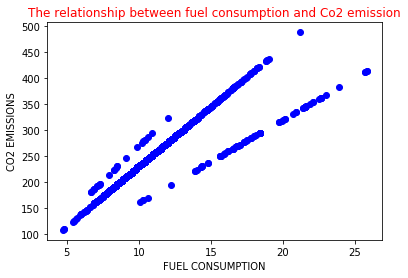

In [9]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS, color='blue')
plt.title('The relationship between fuel consumption and Co2 emission', color='red')
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('CO2 EMISSIONS')
plt.show()

# Train & Test Splited Data Sets

Projemizde kullanılan veri setimizi makine öğrenimi hususlarına uygun olarak train ve test sets olmak üzere ikiye bölmemiz gerekmektedir. 

**Train Set:** Train (eğitim) set bu projede kullanacağımız simple linear regression algoritmasının eğitimi için kullanılacaktır.

**Test Set:** Test seti ise modelimiz eğitildikten sonra modelimizin doğruluk payını test etmek için ayırdığımız veri setimizdir.

Train ve test split işleminde dikkat etmemiz gereken bazı unsurlar bulunmaktadır. Öncelikle veri seti bölme işleminde *train set*'imiz asıl veri setimizin *%80'ninden* oluşmalıdır. Yani veri setimizin yüzde seksenini eğitim için ayrılmalıdır. *Test set* için ise *%20'lik* bir dilim yeterlidir. Bölme işlemlerinde ki bu rakamlar %70'şe %30 olarakta belirlenebilir. Bu değerler best practice'dir. Yani daha önceden yapılmış projelerde bu ayrıştırma değerleri ile iiy sonuçlar alınmıştır. <br> 

Train set'in yüzde seksen olmasının önemli bir nedeni bulunmaktadır. Eğitim setinin daha fazla olması modelin eğitim verimliliğini arttırmaktadır. Ayrıca veri setimiz ne kadar farklı verilerden oluşursa ve miktarı artarsa modelimizin güvenirliği ve verimliliği artar. Kalan yüzdelik dilim ise test amacı ile ayrılmaktadır. <br>

Ayrıştırma işleminde dikkat edilmesi gerek diğer bir husus veri setimiz üzerinden oluşturulacak train ve test sets'lerinin
homojen olmasıdır yani bir birlerine benzer verilerden oluşmasına özen göstermelisiyiz. Diyelimki elimizde 1000 satırlık bir veri seti var ve veriseri a, b, c ve d veri tiplerini barındırsın. Bu veri setinin %80'nin train için ayırdık lakin ayırırken
eğtim setinin içerisine yüzde 40 kadar "*a*" veri tipinden yüzde 40'ta "*b*" veri tipinden oluşturulmuş. "*c*" ve "*d*" veri tipleri yer almamıştır. Bu durum modelin verimliği ve güvenirliği üzerinde büyük zafiyetlere yol açar ve çıakn sonuç bizleri çok yanlış yargılara sürükleyebilir. Bu yüzden veri setini homojen olarak split edilmeis gerekir.

In [19]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

Aşağıdaki *sklearn* kütüphanesine ait *linear_model* modülü import edildi. Bunun akabinde *linear_model'e* ait *LinearRegression* *regr* değişkenine assignet edildi. Artık *regr.* dediğimde linearregression modellinin bütün özelliklerine erişebileceğm. <br>

Train set'imizde bulunan *EnginSize ve CO2EMISSINOS* sütunlarında bulunan değerleri *asanyarray()* metodu yardımıyla ilgili değişkenlere atadık.<br>

**asanarray():** Bu fonksiyon içerisine parametre olarak verilen girdiği diziye dönüştürmek istediğimizde kullanılır. İçerisine parametre değeri olara Tuple, List ve ndarrays alabilir.<br>

**regr.fit():** *LinearRegression()* modeline ait *fit()* fonksiyonu yardımıyla eğitim veri setimizde bulunan her bir veri için en ugyun fit çizgisinin katsayıları yani *Coeficients & Intercept* heasplandı ve bize teslim edildi.

**Documantaion of sklearn.linear_model.LinearRegression:** https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)
print('Teta 0 Coefficients: ', regr.coef_)
print('Teta 1 Intercept: ', regr.intercept_)

Teta 0 Coefficients:  [[38.71659192]]
Teta 1 Intercept:  [126.473936]


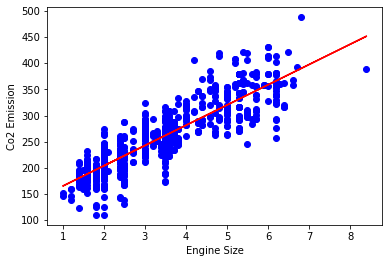

In [21]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], color='red') # fit çizgimiz scatter garfiğine yerleştirdik
plt.xlabel('Engine Size')
plt.ylabel('Co2 Emission')
plt.show()

In [22]:
# Burada modelimizi linear doğrunun formülü ile test ettik
# Polinomun Formülü: y = a + b * x
# y: Bağımlı değişken yani tahmin edilmek istenilen değer (Co2Emission)
# a: teta 0 yani coefficients -'birinci katsayı'
# b teta 1 yani intercept - 'ikinci katsayı'
# x: bağımsız değişken yani tahmin edilmek istenilen değere etki eden değişen (Engine Size)

x = float(input("Please type into engine size: "))
y = regr.coef_ + regr.intercept_ * x

print("Carbon emission of the vehicle with engine size of {}: {}".format(x,y))

Please type into engine size: 3.4
Carbon emission of the vehicle with engine size of 3.4: [[468.72797433]]


### sklearn.metrics modülü

Regrasyon performansınınölçmek için çeşitli kayıp, puan ve fayda işlevlerini uygulayan bir modüldür. Bunlardan bazıları çoklu output durumunu ele alacak şekilde geliştiriştir: mean_square_error, mean_absolute_error, expla_variance_score, r2_score vb. birçok metrik bulunduran çok faydalı bir modüldür. İçerisinde barındırdığı metrikleri kolaylıkla projemize implement edip modelimizin sağlamasını yapabiliriz. 

**Documantaion:** https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

**Mean Absolute Error**: Bu method mutlak hata kaybı veya normal kaybının beklenen değere karşılık gelen bir risk ölçüsü olan ortlaam mutlak hayatı hesaplar. 

**Max_Error:** İşlevi maksimum kalan hatayı, öngörülen değer ile gerçek geğer arasındaki en kötü durum hatası yakalanan bir metrik oalrak hesaplar. Mükemmel bir şekilde sonuç alındığında max_error eğitim setin ile alınan sonuç "0" olur. Bu durum gereçk dünya oldukça olası değildir.

**R2_Score:** Genellikle R² olarak belirtilen belirtleme katsayısını hesaplar. Modeldeki bağımsız değişkenler tarafından açıklama varyansın (y) oranını temsil eder. Aradaki uyum pekişmesinin ve dolayısıyla görğnmeyen numunelerin, açıklanan varyans oranı ile model tarafınfan ne kadar iyi tahmin edilebileceğinin bir ölçüsüdür

**Varyans:** Veri kümesine bağlı olduğunda R² farklı veri kümeleri arasında anlamlı bir şekilde karlılaştırılmayabilir. Mümkün olan en iyi puan 1.0'dır ve negatifte olabilir. Girdi özelliklerini dikkate almadan her zaman beklenen y değerini tahmin eden dabit bir model R² puanu ise 0.0'olur.

In [23]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

# Mean Absolute Error: İstatistiksel ortalama mutlak hata iki sürekş değişken arasındaki farkın bir ölçüsüdür.
# Regrasyon analizinde, ortalama kare hatası terimi bazen hata varyasının tarafsız tahminini ifade etmek için
# kullanılır.
print("Mean Absolute Error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
# np.mean() => Yukarıdaki iki metrikte önemli rol alan bu method belirtilen ekson boyunca aritmatik ortalamayı 
# hesaplayan bir methodur. Dizi öğelerinin ortalamasını döndürür.
print("Residual Sum of Squares: %.2f" % np.mean((test_y_ - test_y) ** 2))
# Redisual Sum of Squares: İstatistikte kareli artıkların toplamı veya kare hata tahmini toplamı olarak da bilinene karelerin 
# artık toplamıi artıkların karelerinin toplamıdır. Veriler ve bir tahmin modeli arasındaki tutarsızlığın bir ölçüsüdür.
# Küçük bir RSS modelin verelere sıkıca uyduğunu gösterir. Yani RSS değerinin sıfıra yakın olması modelin doğruluk 
# payını gösterir.
print("R2-Score: %.2f" % r2_score(test_y_, test_y))
# Regrasyonda R2 belirleme katsayısı regrasyon tahminlerinin geçek veri notkarlarına ne kaddar iyi yaklaştığının 
# istatiksel bir ölçümüdür. R2 skroru 1'e yaklaştıkça regrsasyon fit çizgisinin verilere mükemmel şekilde uyduğunu gösterir.

Mean Absolute Error: 23.92
Residual Sum of Squares: 1043.52
R2-Score: 0.68
